## Integración numérica
#### Definición de la integral - Suma de Riemann
\begin{equation*}
\int\limits_a^b f(x)dx = \lim_{\Delta x \rightarrow 0} \sum_{i=0}^n f(x_i)\Delta x
\end{equation*}
donde 
\begin{equation*}
\Delta x = \frac{b-a}{n}
\end{equation*}

#### Método del rectangulo
\begin{equation*}
\int\limits_a^b f(x)dx = \sum_{i=0}^n f(x_i) \Delta x
\end{equation*}


#### Método del punto medio 
\begin{equation*}
\int\limits_a^b f(x)dx = \sum_{i=0}^n f\left(\frac{x_{i+1}+x_i}{2} \right) \Delta x
\end{equation*}


#### Método del trapecio 
\begin{equation*}
\int\limits_a^b f(x)dx = \sum_{i=0}^n \left(\frac{f(x_{i+1})+f(x_i)}{2} \right) \Delta x
\end{equation*}

#### Método de Simpson
\begin{equation*}
\int\limits_a^b f(x)dx = \sum_{i=0}^n \left(\frac{f(x_{i+1})+4f\left(\frac{x_{i+1}+x_{i}}{2} \right)+f(x_i)}{6} \right) \Delta x
\end{equation*}


In [96]:
import matplotlib.pyplot as plt
import numpy as np


class integral_solve:
    """
    Clase que contiene los métodos de integración antes mencionados
    """
    def __init__(self, a, b, n):
        """
        Función constructor que recibe los parámetros de la integral
        """
        self.a = a
        self.b = b
        self.n = n
        self.delta = (b - a) / n

    def rectangle(self, f):
        """
        Función que contiene el método de integración del rectangulo
        """
        sum = 0
        self.plot_line(f)
        for i in range(self.n):
            # Calculo de las x de la región que se integra
            x = self.a + self.delta * (i + 1)
            x_i = x - self.delta
            # Grafica de la barra integrada
            self.plot(f, x_i, x)
            # Suma de la integral
            sum += f(x)
        # Resultado guardado
        self.result = sum * self.delta
        self.write_result("del rectangulo")
        plt.show()

    def middle_point(self, f):
        """
        Función que contiene el método de integración del punto medio
        """
        sum = 0
        self.plot_line(f)
        for i in range(self.n):
            # Calculo de la región a integrar
            x = self.a + self.delta * (i + 1)
            x_i = x - self.delta
            # Calculo del punto medio
            middle_x = (x + x_i) / 2
            # Gráfica de las barras a integrar
            self.plot(f, middle_x, middle_x + self.delta)
            # Suma de la integral
            sum += f(middle_x)
        # Resultado guardado
        self.result = sum * self.delta
        self.write_result("del punto medio")
        plt.show()

    def trapeze(self, f):
        """
        Función que contiene el método de integración del trapecio
        """
        sum = 0
        self.plot_line(f)
        for i in range(self.n):
            # Calculo de la region a integrar
            x = self.a + self.delta * (i + 1)
            x_i = x - self.delta
            # Calculo del punto medio
            middle_x = (x + x_i) / 2
            # Calculo del valor medio de f en la region
            middle_f = f(x) + f(x_i)
            # Gráfica de las barras
            self.plot(f, middle_x, middle_x + self.delta)
            # Suma de la integral
            sum += middle_f
        # Guardado del resultado
        self.result = sum * self.delta / 2
        self.write_result("del trapecio")
        plt.show()

    def simpson(self, f):
        """
        Función que contiene el método de integración del trapecio
        """
        sum = 0
        self.plot_line(f)
        for i in range(self.n):
            # Calculo de la region a integrar
            x = self.a + self.delta * (i + 1)
            x_i = x - self.delta
            # Calculo del punto medio
            middle_x = (x + x_i) / 2
            # Gráfica de las barras
            self.plot(f, middle_x, middle_x + self.delta)
            # Suma de la integral
            sum += f(x) + f(x_i) + 4 * f(middle_x)
        # Guardado del resultado
        self.result = sum * self.delta / 6
        self.write_result("de Simpson")
        plt.show()

    def write_result(self, text):
        """
        Función que escribe el resultado de la integral junto con el método utilizado
        """
        return print(
            "El resultado de la integral es {:.3f} con el método {}".format(
                self.result, text, self.a, self.b, self.n))

    def plot_line(self, f):
        """
        Función que gráfica a la función
        """
        x = np.linspace(self.a, self.b, 10000)
        y = f(x)
        plt.plot(x, y, lw=2, color="#000000")

    def plot(self, f, x_i, x_f):
        """
        Función que gráfica cada barra que se va integrando
        """
        x = [x_i, x_f]
        y = [f(x_i), f(x_f)]
        plt.fill_between(x, y, color="#83c5be", alpha=0.5)

El resultado de la integral es 2.251 con el método del rectangulo


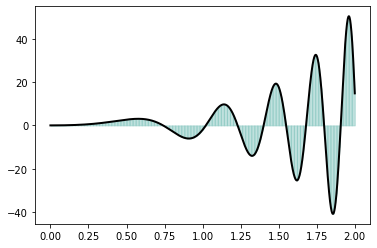

El resultado de la integral es 2.186 con el método del punto medio


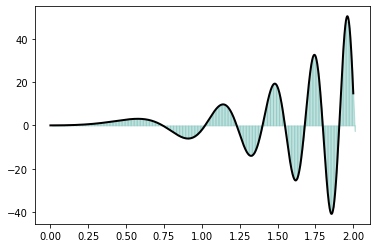

El resultado de la integral es 2.103 con el método del trapecio


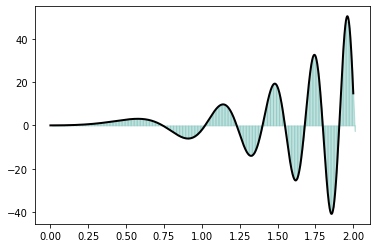

El resultado de la integral es 2.158 con el método de Simpson


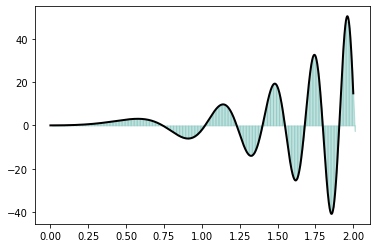

In [102]:
def f(x):
    return np.sin(x**3+5*x**2)*np.exp(2*x)


parameters = {
    "a": 0,
    "b": 2,
    "n": 100,
}
problem = integral_solve(
    parameters["a"],
    parameters["b"],
    parameters["n"],
)
problem.rectangle(f)
problem.middle_point(f)
problem.trapeze(f)
problem.simpson(f)

## Scipy para la integración numérica

In [105]:
import scipy.integrate as integration

In [118]:
class integration_scipy(integral_solve):
    def __init__(self, a, b, n):
        super().__init__(a, b, n)

    def scipy(self, f):
        self.plot_line(f)
        self.plot_fill(f)
        self.result, error = integration.quad(f, self.a, self.b)
        self.write_result("de scipy")
        plt.show()

    def plot_fill(self, f):
        x = np.linspace(self.a, self.b, 10000)
        y = f(x)
        plt.fill_between(x, y, color="#83c5be", alpha=0.5)

El resultado de la integral es -0.057 con el método del rectangulo


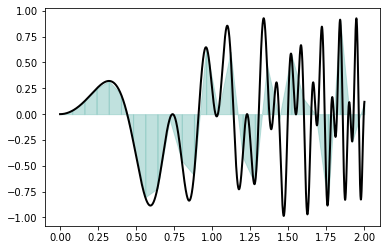

El resultado de la integral es -0.131 con el método del punto medio


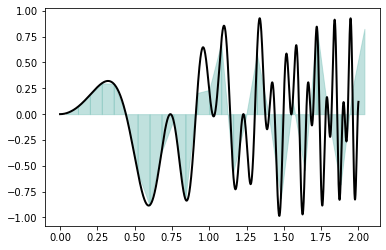

El resultado de la integral es -0.062 con el método del trapecio


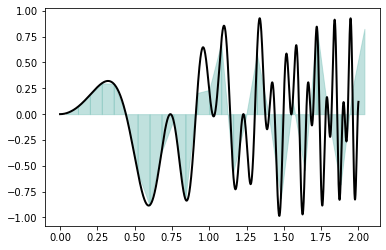

El resultado de la integral es -0.108 con el método de Simpson


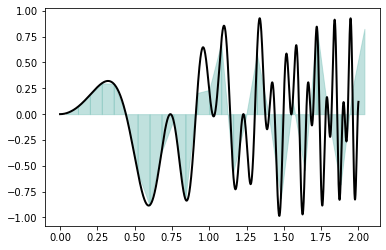

El resultado de la integral es -0.099 con el método de scipy


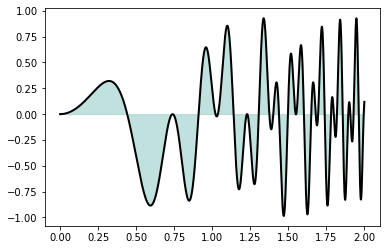

In [126]:
def f(x):
    return np.sin(x**3+5*x**2)*np.cos(2*x+8*x**3)

parameters = {
    "a": 0,
    "b": 2,
    "n": 25,
}

problem = integration_scipy(
    parameters["a"],
    parameters["b"],
    parameters["n"],
)
problem.rectangle(f)
problem.middle_point(f)
problem.trapeze(f)
problem.simpson(f)
problem.scipy(f)